In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn

In [137]:
df = pd.read_csv('total.csv')
df = df.reindex(columns = ['tr_log_testduration', 'tr_log_lan', 'tr_log_num_tests_run','loc', 'tr_log_bool_tests_failed'])
df = df.rename(columns={'tr_log_testduration': 'time', 'tr_log_lan' : 'language', 'tr_log_num_tests_run' : 'test_count', 'tr_log_num_test_suites_run' : "test_suites_count", 'tr_log_bool_tests_failed' : 'status'})
df = df[df['time'].notnull() & df['test_count'].notnull() & df['status'].notnull()]
df.eval('log_test_count = log(test_count)', inplace = True)
df.eval('log_time = log(time)', inplace = True)

In [138]:
df

,time,language,test_count,loc,status,log_test_count,log_time
0,0.53,ruby,821.0,3862,False,6.710523,-0.634878
1,0.76,ruby,827.0,3925,False,6.717805,-0.274437
2,0.69,ruby,838.0,3922,False,6.731018,-0.371064
3,0.63,ruby,843.0,3965,False,6.736967,-0.462035
4,0.77,ruby,858.0,3962,False,6.754604,-0.261365
...,...,...,...,...,...,...,...
31204,0.08,python,9.0,392,False,2.197225,-2.525729
31205,32.02,python,769.0,51334,True,6.645091,3.466361
31206,32.98,python,770.0,51245,True,6.646391,3.495901
31207,31.31,python,771.0,51267,False,6.647688,3.443938


In [139]:
df = df[(df['loc'] > 2000) &(df['loc'] < 200000) & (df['time'] > 1) & (df['test_count'] > 1) & (df['status'] == False)]
df = df[((df["loc"] - df["loc"].mean()).abs() < 3 * df["loc"].std()) & 
        ((df["test_count"] - df["test_count"].mean()).abs() < 3 * df["test_count"].std()) &
       ((df["log_time"] - df["log_time"].mean()).abs() < 3 * df["log_time"].std())]

In [131]:
df = df[(df['loc'] > 500) &(df['loc'] < 200000) & (df['time'] > 1) & (df['test_count'] > 1)]
df = df[((df["loc"] - df["loc"].mean()).abs() < 3 * df["loc"].std()) & 
        ((df["log_test_count"] - df["log_test_count"].mean()).abs() < 3 * df["log_test_count"].std()) &
       ((df["log_time"] - df["log_time"].mean()).abs() < 3 * df["log_time"].std())]

In [140]:
df

,time,language,test_count,loc,status,log_test_count,log_time
5,6.63,ruby,858.0,3969,False,6.754604,1.891605
6,4.48,ruby,916.0,4031,False,6.820016,1.499623
41,3.81,ruby,246.0,4583,False,5.505332,1.337629
45,4.45,ruby,246.0,4579,False,5.505332,1.492904
46,3.64,ruby,246.0,4579,False,5.505332,1.291984
...,...,...,...,...,...,...,...
31178,27.90,python,196.0,11931,False,5.278115,3.328627
31180,25.35,python,220.0,13530,False,5.393628,3.232779
31181,57.58,python,257.0,13793,False,5.549076,4.053175
31207,31.31,python,771.0,51267,False,6.647688,3.443938


In [141]:
df['ruby'] = [1 if df.iloc[i, 1] == 'ruby' else 0 for i in range(len(df))]
df['python'] = [1 if df.iloc[i, 1] == 'python' else 0 for i in range(len(df))]
df['java'] = [1 if df.iloc[i, 1] == 'java' else 0 for i in range(len(df))]

In [142]:
df

,time,language,test_count,loc,status,log_test_count,log_time,ruby,python,java
5,6.63,ruby,858.0,3969,False,6.754604,1.891605,1,0,0
6,4.48,ruby,916.0,4031,False,6.820016,1.499623,1,0,0
41,3.81,ruby,246.0,4583,False,5.505332,1.337629,1,0,0
45,4.45,ruby,246.0,4579,False,5.505332,1.492904,1,0,0
46,3.64,ruby,246.0,4579,False,5.505332,1.291984,1,0,0
...,...,...,...,...,...,...,...,...,...,...
31178,27.90,python,196.0,11931,False,5.278115,3.328627,0,1,0
31180,25.35,python,220.0,13530,False,5.393628,3.232779,0,1,0
31181,57.58,python,257.0,13793,False,5.549076,4.053175,0,1,0
31207,31.31,python,771.0,51267,False,6.647688,3.443938,0,1,0


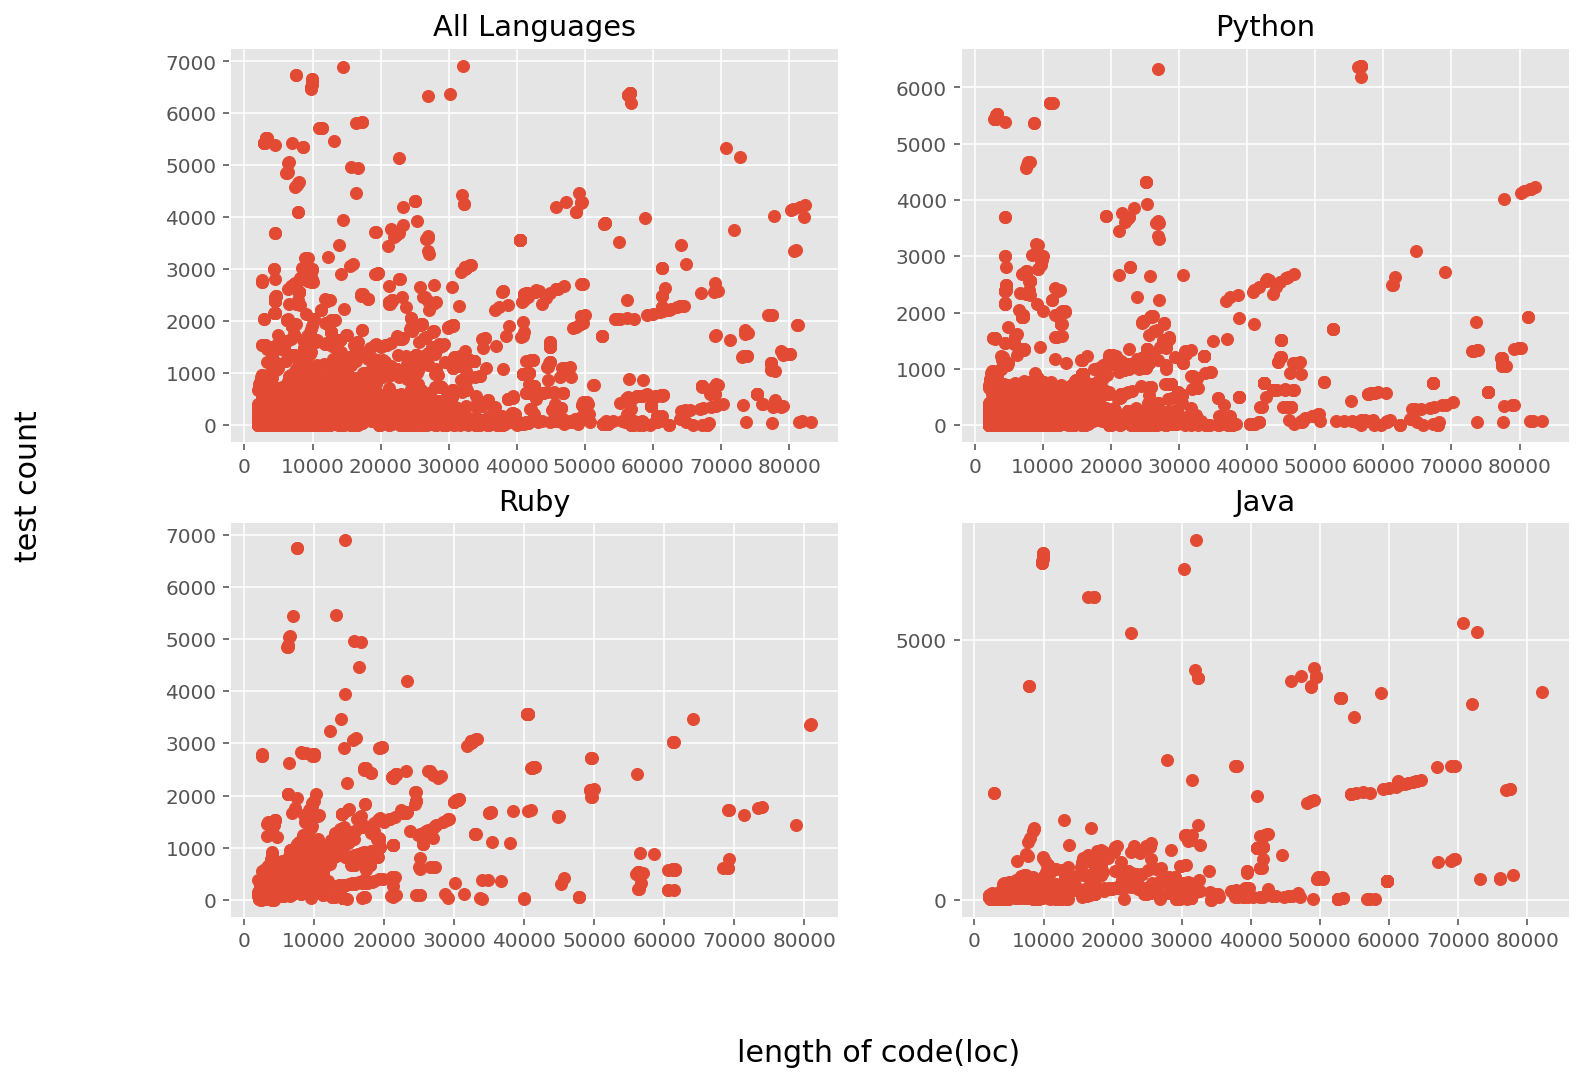

<Figure size 432x288 with 0 Axes>

In [150]:
df_ruby = df[df['ruby'] == 1]
df_python = df[df['python'] == 1]
df_java = df[df['java'] == 1]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].scatter(df['loc'],df['test_count']) 
ax[0, 0].set_title('All Languages')

ax[1, 0].scatter(df_ruby['loc'],df_ruby['test_count'], label='ruby') 
ax[1, 0].set_title('Ruby')

ax[0, 1].scatter(df_python['loc'],df_python['test_count']) 
ax[0, 1].set_title('Python')

ax[1, 1].scatter(df_java['loc'],df_java['test_count']) 
ax[1, 1].set_title('Java')
ax[1, 1].yaxis.set_major_locator(plt.MultipleLocator(5000))

fig.text(0.5, 0, 'length of code(loc)', ha='center', size=15)
fig.text(0, 0.5, 'test count', va='center', rotation='vertical', size=15)
        
plt.show()
plt.savefig("pic1.jpg")

In [148]:
df_python['loc'].corr(df_python['test_count'])

0.3068600446700593